# Pricing European Option with Black Scholes Model using Monte Carlo Simulation 
$~$
$~$
$~$

## Intro

European Option could be only exercised at expiry date $T$

- Call options give the right to buy at strike price. Given the asset price at maturity $S_T$ and strike price $K$, it has payoff: 

> $C_T = max(0,S_T - K)$

- Put options give the right to sell at strike price. Similarly, it has payoff:

> $P_T = max(0,K - S_T)$

<br>


#### Example of payoffs of call option and put option at strike price $50

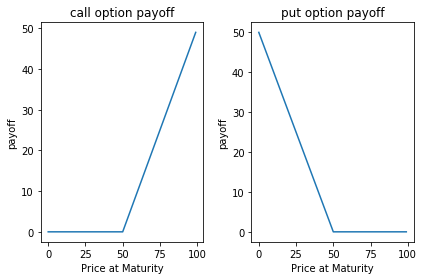

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#call = lambda S: np.maximum(0, S - 50)
def call(S):
    return np.maximum(0,S-50)
#put = lambda S: np.maximum(0, 50 - S)
def put(S):
    return np.maximum(0,50-S)

n = np.asarray(range(0,100))

payofffig = plt.figure(1)
#call
plt.subplot(1, 2, 1)
f1 = plt.plot(n,call(n),'-')
plt.title('call option payoff')
plt.xlabel('Price at Maturity')
plt.ylabel('payoff')

#put
plt.subplot(1, 2, 2)
f2 = plt.plot(n,put(n),'-')
plt.title('put option payoff')
plt.xlabel('Price at Maturity')
plt.ylabel('payoff')

plt.tight_layout()

***


## Risk-neutral Valuation

By risk-neutral valuation, we assume the fair price of the option is the payoff at the expiry date, and the asset will earn risk free interest rate $r$.
Then for any time $t$ before expiry time $T$, we have remainnig time $T-t$. We could express the present value of our option by:
> $C_t = E(max(0,S_T - K))$
<br>
> $P_t = E(max(0,K - S_T))$
<br>

By applying a model on the compound interest rate r, we have $S_T =e^{rT} S_{T-1}$, which means $S_T = S_0 e^{rT}$. Then we could update our present value of options:
> $C_t = e^{-r(T-t)}E(max(0,S_T - K))$ 
<br>
> $P_t = e^{-r(T-t)}E(max(0,K - S_T))$ 
<br>

In the expressions above, all variables are known except $S_T$, which will be simulated below.
<br>
***

## Simulating Asset Prices

Assume we have given volatility $\sigma$, risk free interest rate $r$, and the price of asset follows Brownian Motion.
<br>
As stock prices evolve over time, with a magnitude dependent on their volatility. The Black Scholes model treats this evolution in terms of a random walk (a sequence of increments/decrements).
A $T-t$ step random walk is distributed as a random variable in the normal distribution with mean $0$ and variance $\sigma^2(T-t)$, denoted $X = \mathcal{N}(0,\sigma^2(T-t))$. Its compounded effect on the stock price follows a log-normal distribution $e^X$
<br>
So the expected value is given by: 

> $E[Y] = S_0e^{r(T-t)+X}$

The Black-Scholes model predicts the stock price using the median of the log-normal distribution:

> $S_T = S_t e^{(r-0.5\sigma^2)(T-t)}$

And geometric brownian motion gives:

> $S_T = S_t e^{(r-0.5\sigma^2)(T-t)+\epsilon}$

where $\epsilon$ is a random value sampled from $\mathcal{N}(0,\sigma^2(T-t))$

In the equation above:
<br>
> $\sigma$ is the volatility, or standard deviation on returns.
<br>
$T-t$ is the annualised time remainning.(30 days = 30/365)
<br>
$r$ is the risk free interest rate
<br>
$S_t$ is the price of asset at time t
<br>
$S_T$ is the predicted price of asset at maturity
<br>
$\epsilon$ is random value with standart normal distribution

***
## Pricing options using Monte Carlo

We could generate many $S_T$ and calculate payoffs and average them
<br>
<br>
The following code uses data from a call option on Google, GOOG181123C01075000. It has an implied volatility of 37.26%, strike price 1,075.00 which expires on 2018-11-23. It has last price 60.35. Google has a current price 1,103.69.
<br>
Today's date is 2018-10-23GOOG181123C01075000
<br>
$r$ is approximated by USD LIBOR 1-month rat, around 2.28650% / 12
<br>
<br>
let $S_0,r,sigma,t$ stands for initial price, interest rate, volatility, and time interval respectively, function St(S0, r, sigma, t) returns $S_T$

In [20]:
import datetime
S0 = 1103.69
K = 1075
r = 2.28650/100/12
sigma = 0.3726
t = (datetime.date(2018,11,23) - datetime.date(2018,10,23)).days / 365.0

In [21]:
import math

def St(S0, r, sigma, t):
    epsilon = np.random.normal(0,(math.sqrt(t*sigma**2)))
    St = S0 * math.e**((r - (sigma**2)/2) * t + epsilon)
    return St

Function call_payout(S_T, K) and put_payout(S_T, K) returns the payoffs of given generated price

In [22]:
def call_payout(S_T, K):
    return max(S_T - K, 0.0)
def put_payout(S_T, K):
    return max(K - S_T, 0.0)

Function calc_payout(S, sigma, r, T, K) returns payout for call option

In [23]:
def calc_payout(S, sigma, r, T, K):
    S_t = St(S, sigma, r, T)
    payout = call_payout(S_t,K)
    return payout

Monte Carlo

In [24]:
Payout_list = []

for i in range(0,50000):
    Payout_list.append(calc_payout(S0,sigma,r,t,K))

Payout_array = np.asarray(Payout_list)
P_T = np.mean(Payout_array)
discount_factor = math.e**(-r*t)
price_now = discount_factor * P_T

print (price_now)

64.16305864348027


<br>
Thus we see the pricing for the option is $64.16$, which is close to the last trade price $60.35$

<img src="GOOG181123C01075000.jpg">